- Age vs Productivity correlation
- Years of Experience impact on remote work effectiveness
- WFH Days per Week optimal balance analysis
- Environment factors - Home office quality significantly impacts performance
- Department differences - Tech roles benefit more from WFH

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('/Users/efeemirhandogan/Documents/AIN429/project/remote_work_productivity.csv')
df.head()

,Employee_ID,Age,Years_Experience,WFH_Days_Per_Week,Gender,Education_Level,Marital_Status,Has_Children,Location_Type,Department,...,Quality_Score,Innovation_Score,Efficiency_Rating,Meetings_Per_Week,Commute_Time_Minutes,Job_Satisfaction,Stress_Level,Work_Life_Balance,Survey_Date,Response_Quality
0,EMP0001,39,10,2,Female,Associate Degree,Married,Yes,Urban,Product,...,58.1,52.1,72.1,4,48,55.9,6,8,2024-04-05,Medium
1,EMP0002,33,4,5,Female,Master Degree,Married,No,Urban,Customer Success,...,93.3,77.9,89.5,12,0,96.1,3,8,2024-01-29,High
2,EMP0003,40,3,3,Male,PhD,Single,Yes,Rural,Operations,...,84.7,63.2,95.0,15,24,90.4,5,6,2024-01-18,High
3,EMP0004,48,14,3,Male,Bachelor Degree,Married,Yes,Urban,Finance,...,67.8,82.5,95.0,8,8,100.0,10,5,2024-04-18,High
4,EMP0005,32,6,5,Male,High School,Divorced,Yes,Rural,Engineering,...,86.4,67.5,95.0,10,0,100.0,3,4,2024-02-19,High


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,35.190667,8.406908,22.0,29.000,35.0,41.000,65.0
Years_Experience,1500.0,4.594667,4.740607,0.0,1.000,3.0,7.000,32.0
WFH_Days_Per_Week,1500.0,2.857333,1.489897,0.0,2.000,3.0,4.000,5.0
Work_Hours_Per_Week,1500.0,41.734000,6.038285,25.0,37.000,42.0,46.000,65.0
Productivity_Score,1500.0,83.094867,15.227276,35.0,73.700,86.7,98.000,98.0
Task_Completion_Rate,1500.0,82.507133,15.390392,40.0,72.200,86.0,96.100,100.0
Quality_Score,1500.0,84.410933,13.881407,50.0,75.200,87.6,96.225,100.0
Innovation_Score,1500.0,72.821667,14.994149,30.0,62.600,74.8,84.200,95.0
Efficiency_Rating,1500.0,90.488533,9.051719,43.4,90.475,95.0,95.000,95.0
Meetings_Per_Week,1500.0,8.080000,2.944947,1.0,6.000,8.0,10.000,19.0


In [4]:
print(df.isnull().sum().sum())
df.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee_ID                   1500 non-null   object 
 1   Age                           1500 non-null   int64  
 2   Years_Experience              1500 non-null   int64  
 3   WFH_Days_Per_Week             1500 non-null   int64  
 4   Gender                        1500 non-null   object 
 5   Education_Level               1500 non-null   object 
 6   Marital_Status                1500 non-null   object 
 7   Has_Children                  1500 non-null   object 
 8   Location_Type                 1500 non-null   object 
 9   Department                    1500 non-null   object 
 10  Job_Level                     1500 non-null   object 
 11  Company_Size                  1500 non-null   object 
 12  Industry                      1500 non-null   object 
 13  H

In [5]:
df.drop(columns=['Employee_ID', 'Survey_Date'], inplace=True)

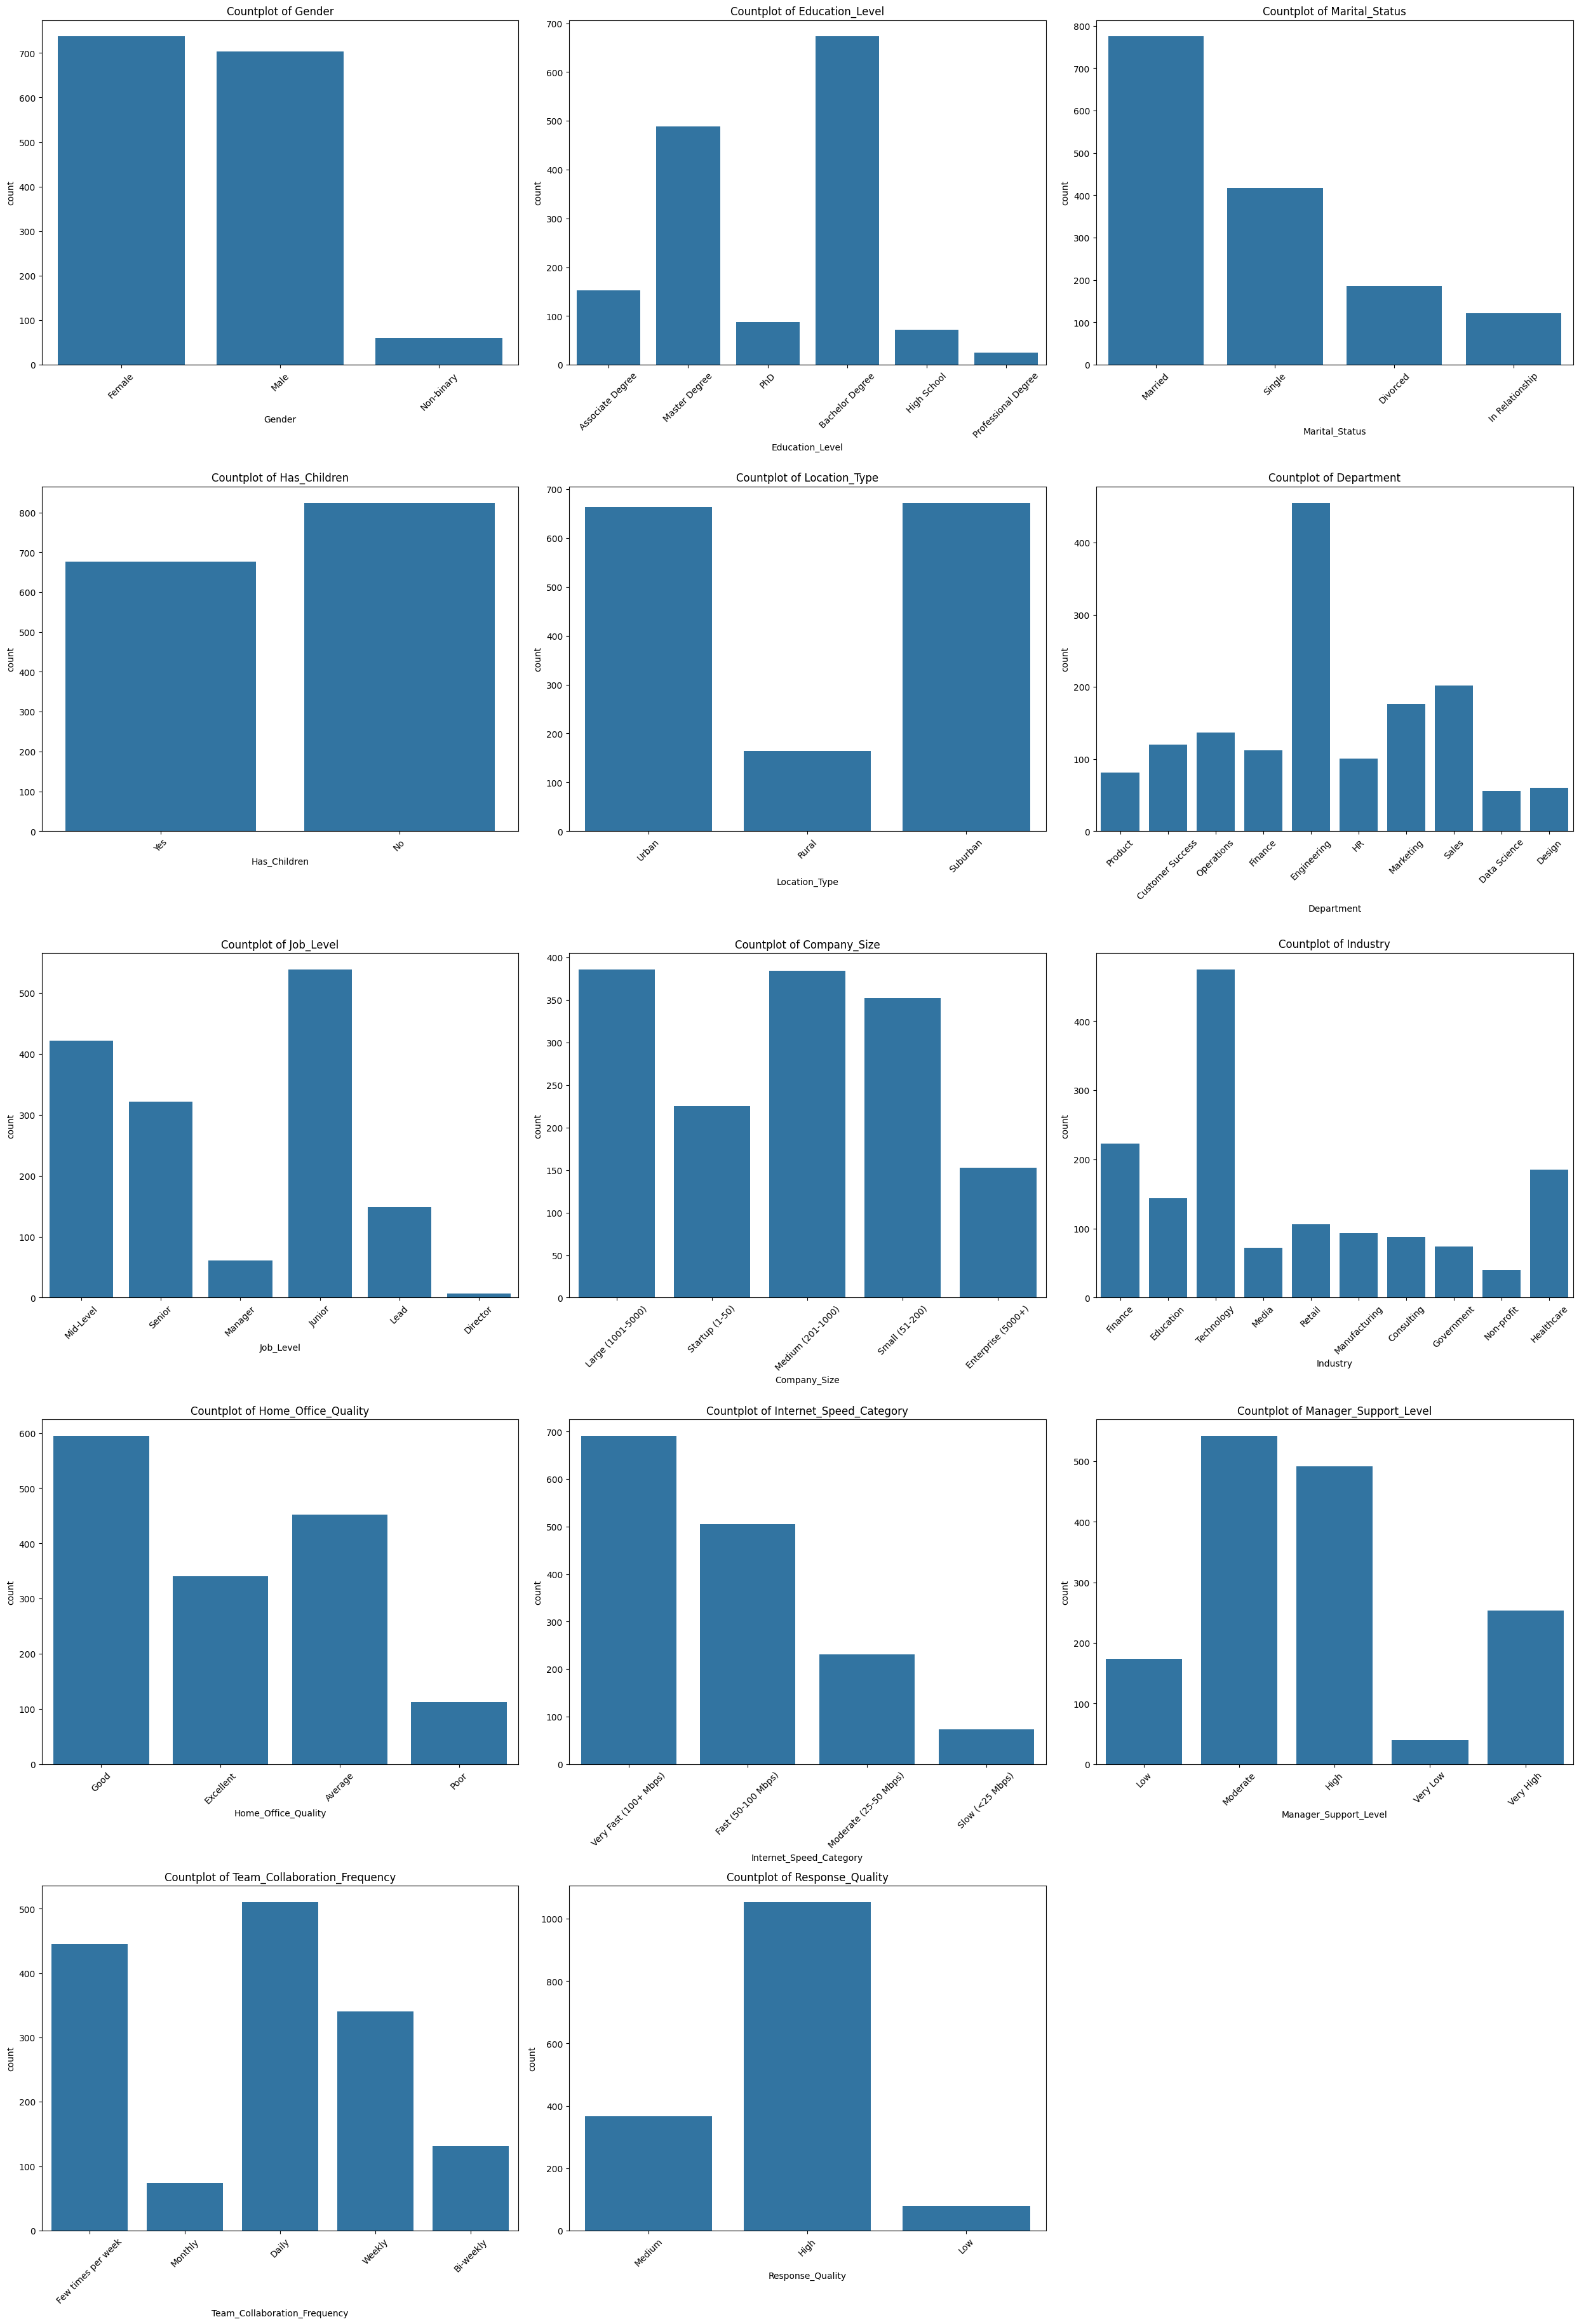

In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns

# countplot
import seaborn as sns
import matplotlib.pyplot as plt

f = plt.figure(figsize=(25,50))
for i, col in enumerate(categorical_cols):
    ax = f.add_subplot(7,3, i+1)
    sns.countplot(data=df, x=col)
    ax.set_title(f'Countplot of {col}')
    plt.xticks(rotation=45)
f.tight_layout()

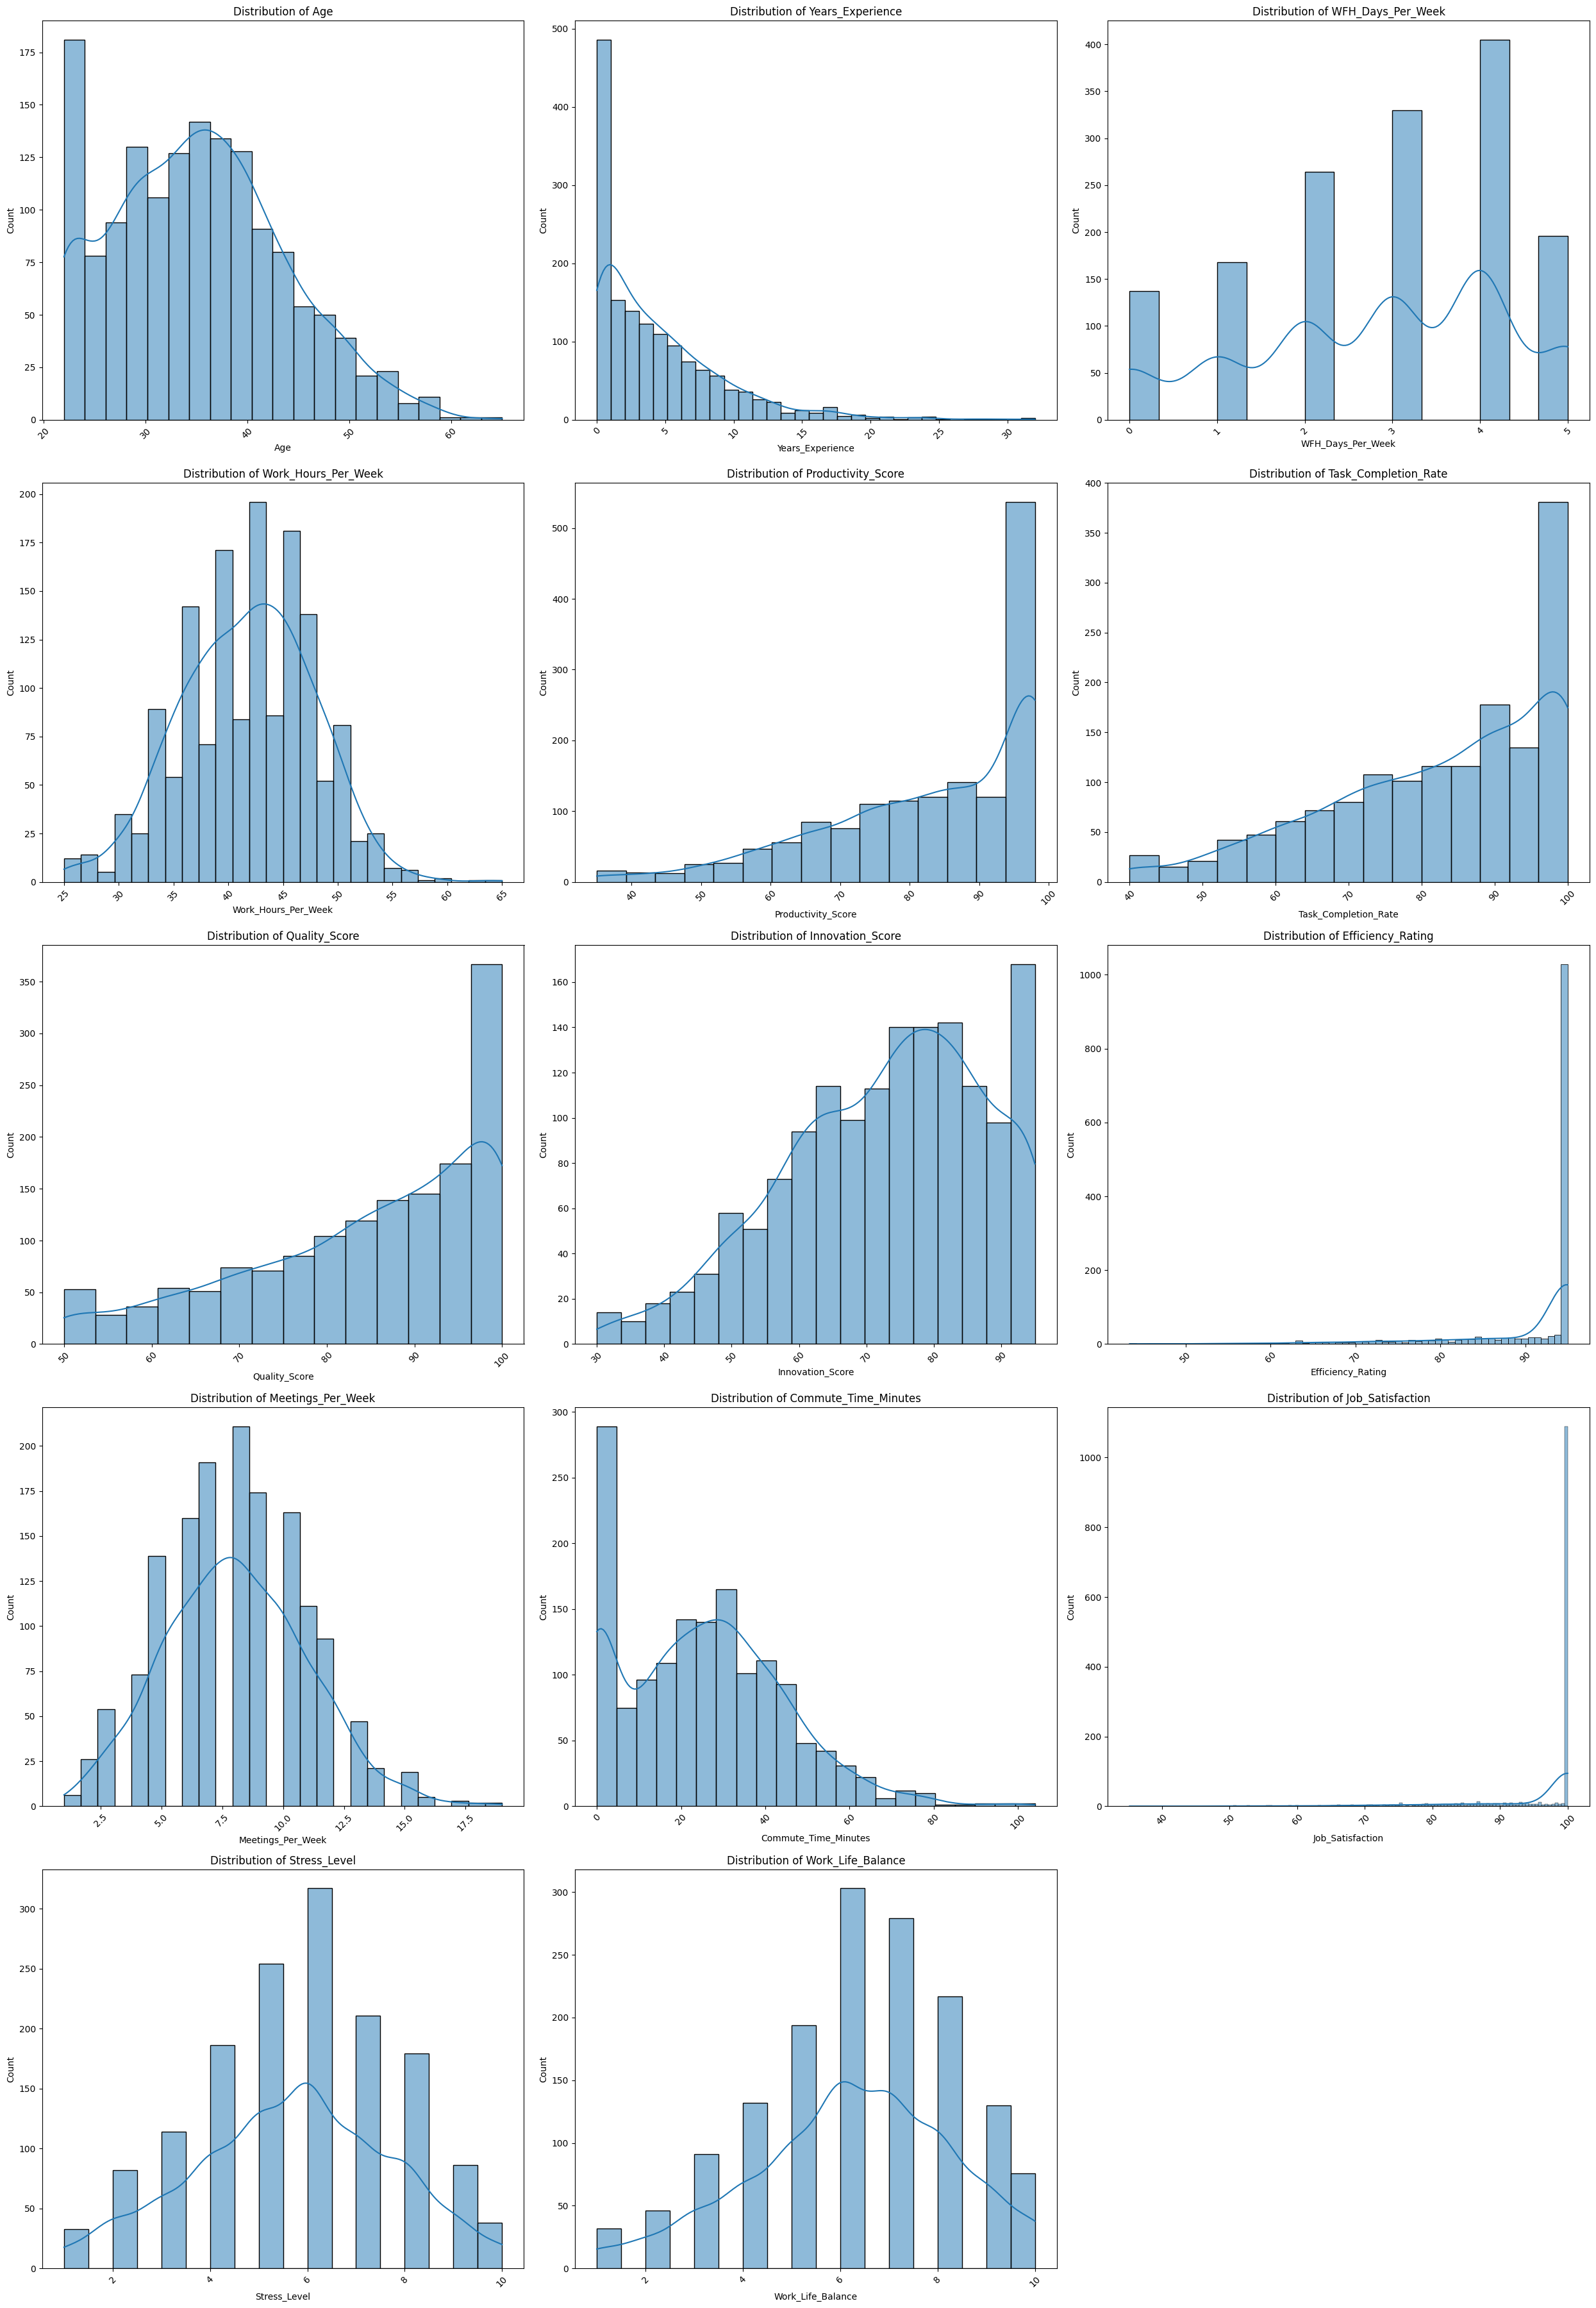

In [7]:
# Distribution of numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
f = plt.figure(figsize=(25,50))
for i, col in enumerate(numerical_cols):
    ax = f.add_subplot(7,3, i+1)
    sns.histplot(data=df, x=col, kde=True)
    ax.set_title(f'Distribution of {col}')
    plt.xticks(rotation=45)
f.tight_layout()

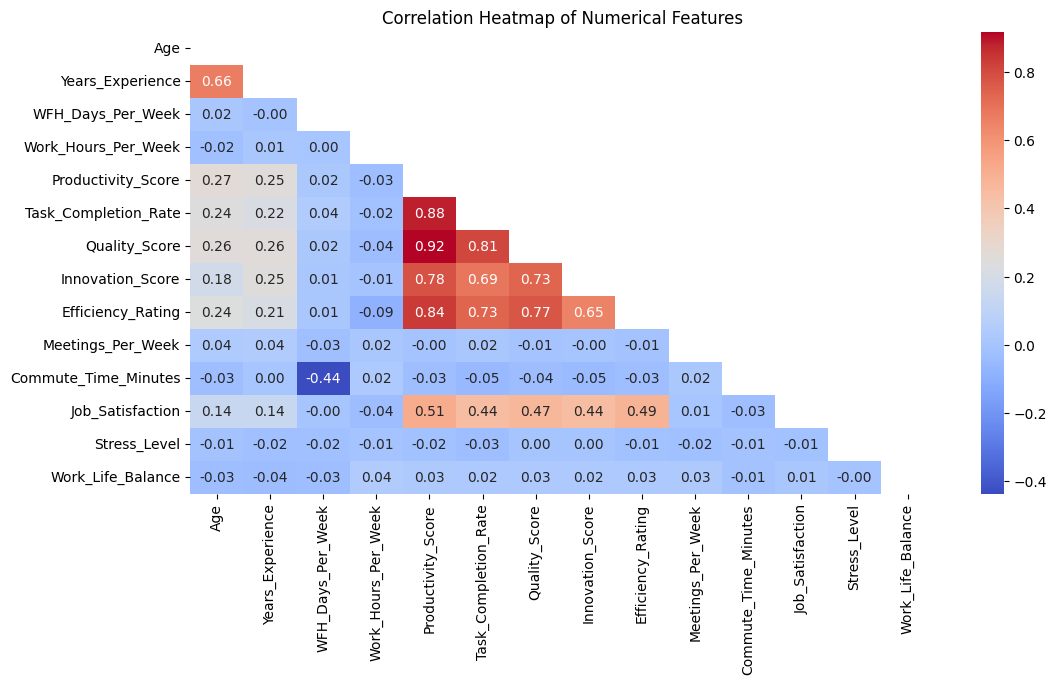

In [8]:
# Correlation heatmap for numerical features
mask = np.triu(df[numerical_cols].corr())
plt.figure(figsize=(12,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', mask=mask, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Aralarında yüksek korelasyon olanları inceleyebiliriz.

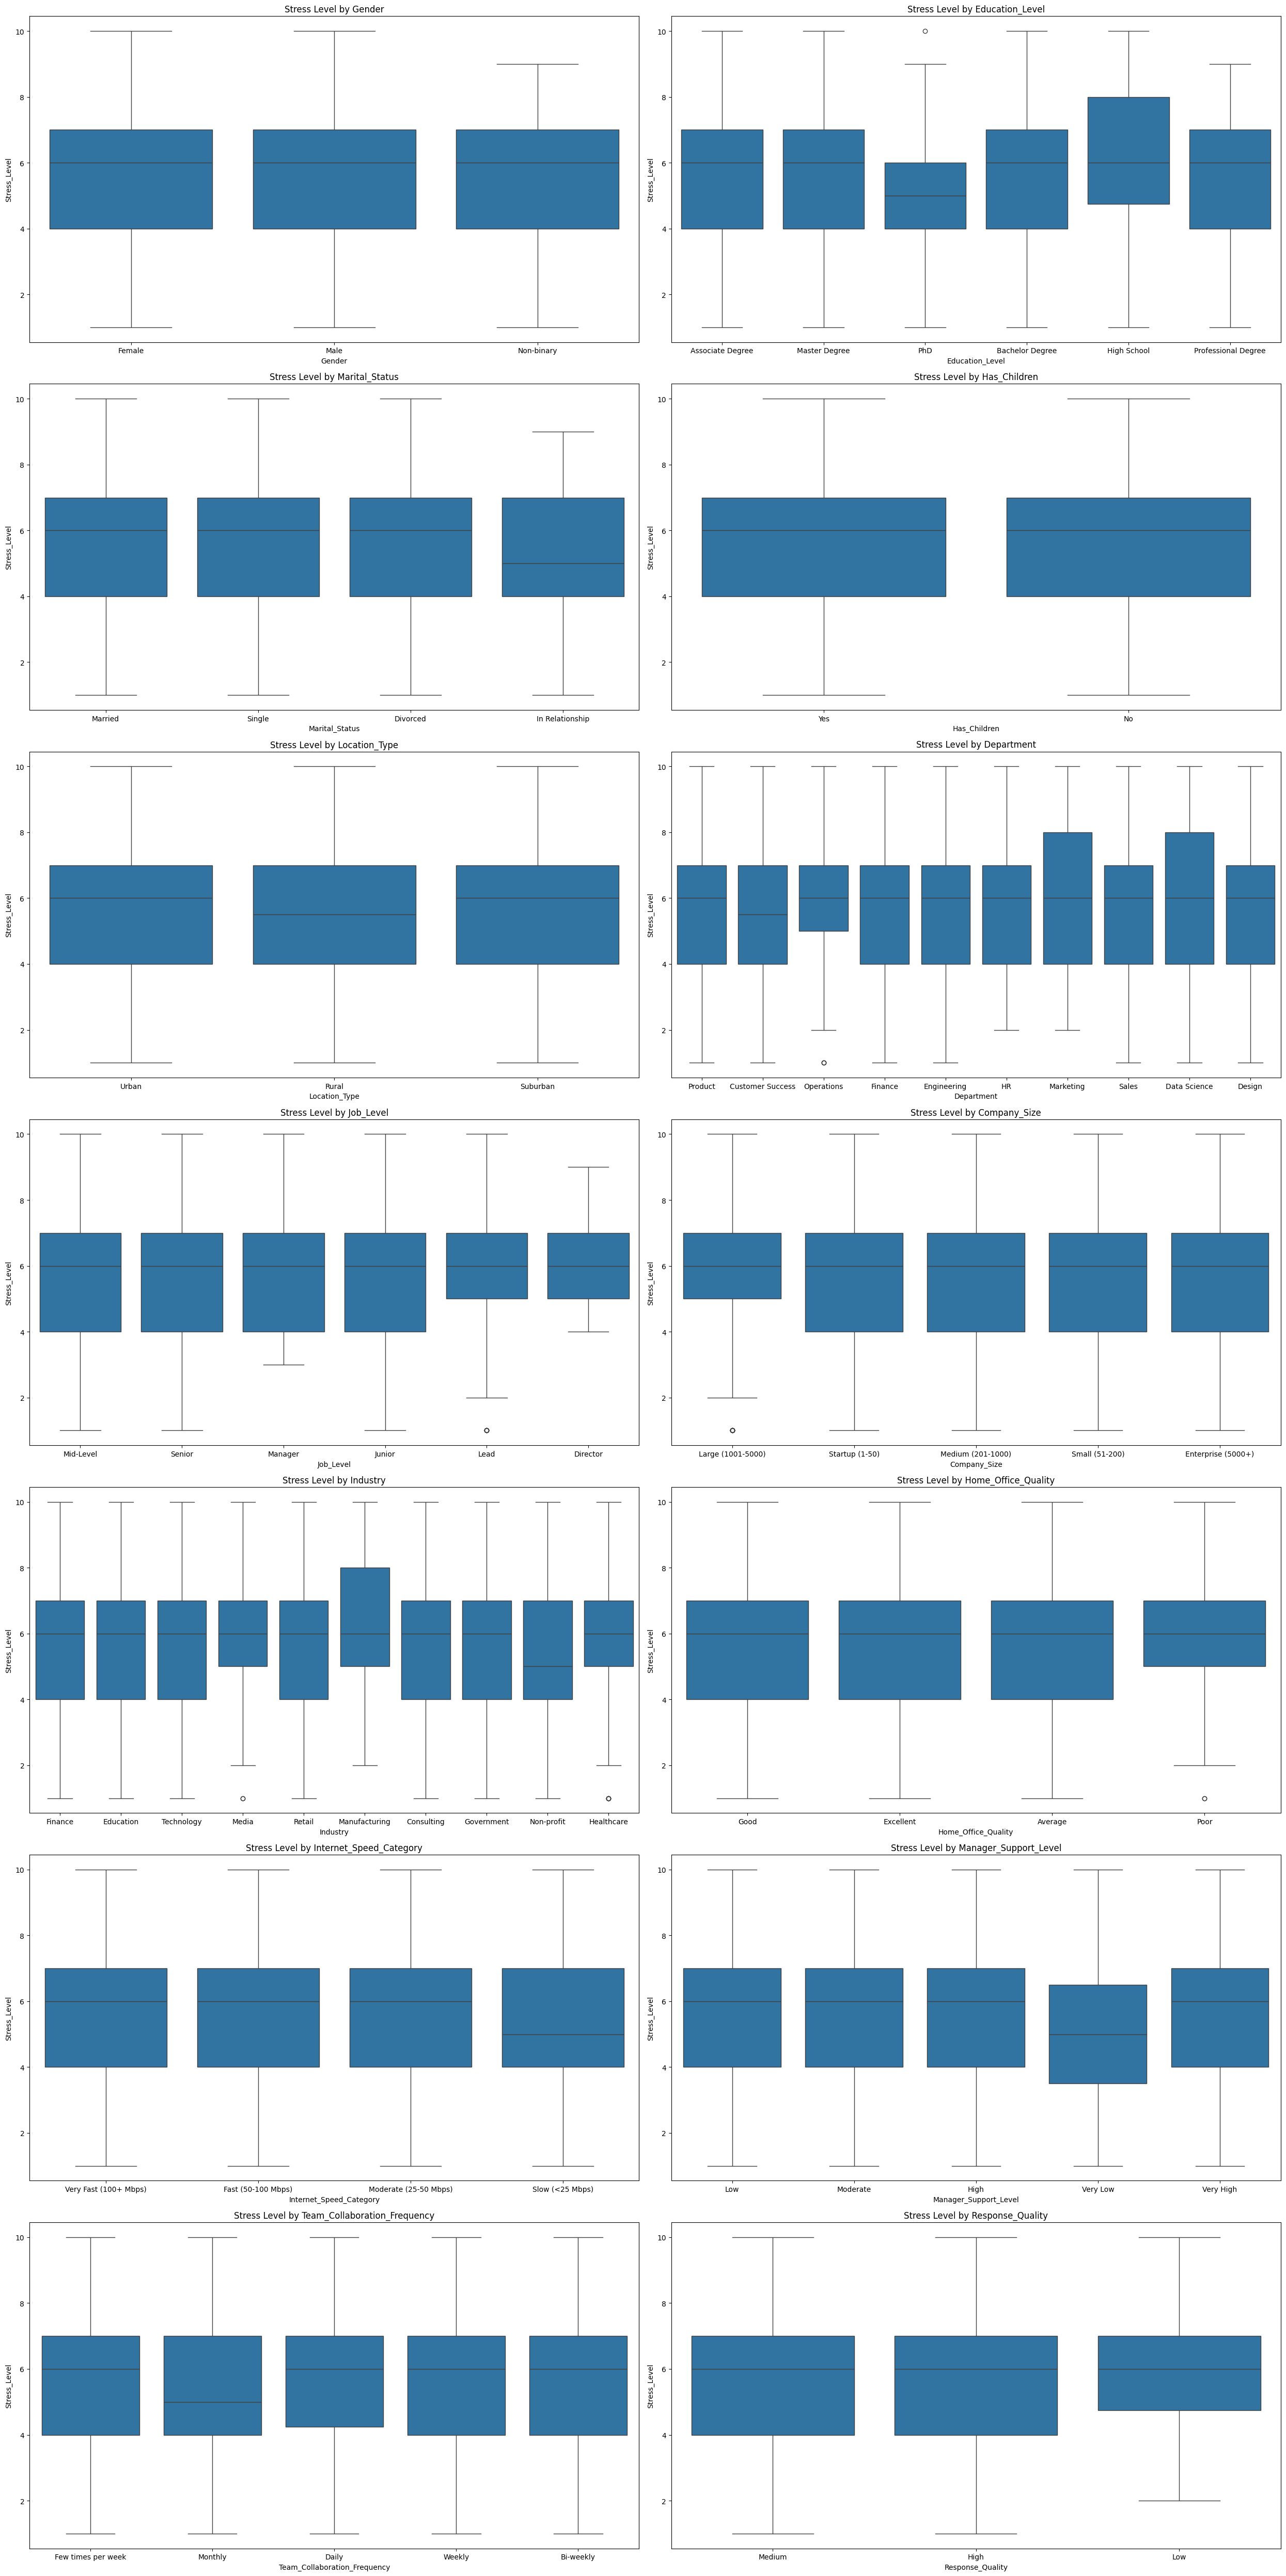

In [9]:
# categorical variables vs stress level
f = plt.figure(figsize=(25,50))
for i,col in enumerate(categorical_cols):
    ax = f.add_subplot(7,2, i+1)
    sns.boxplot(data=df, x=col, y='Stress_Level')
    ax.set_title(f'Stress Level by {col}')
f.tight_layout()

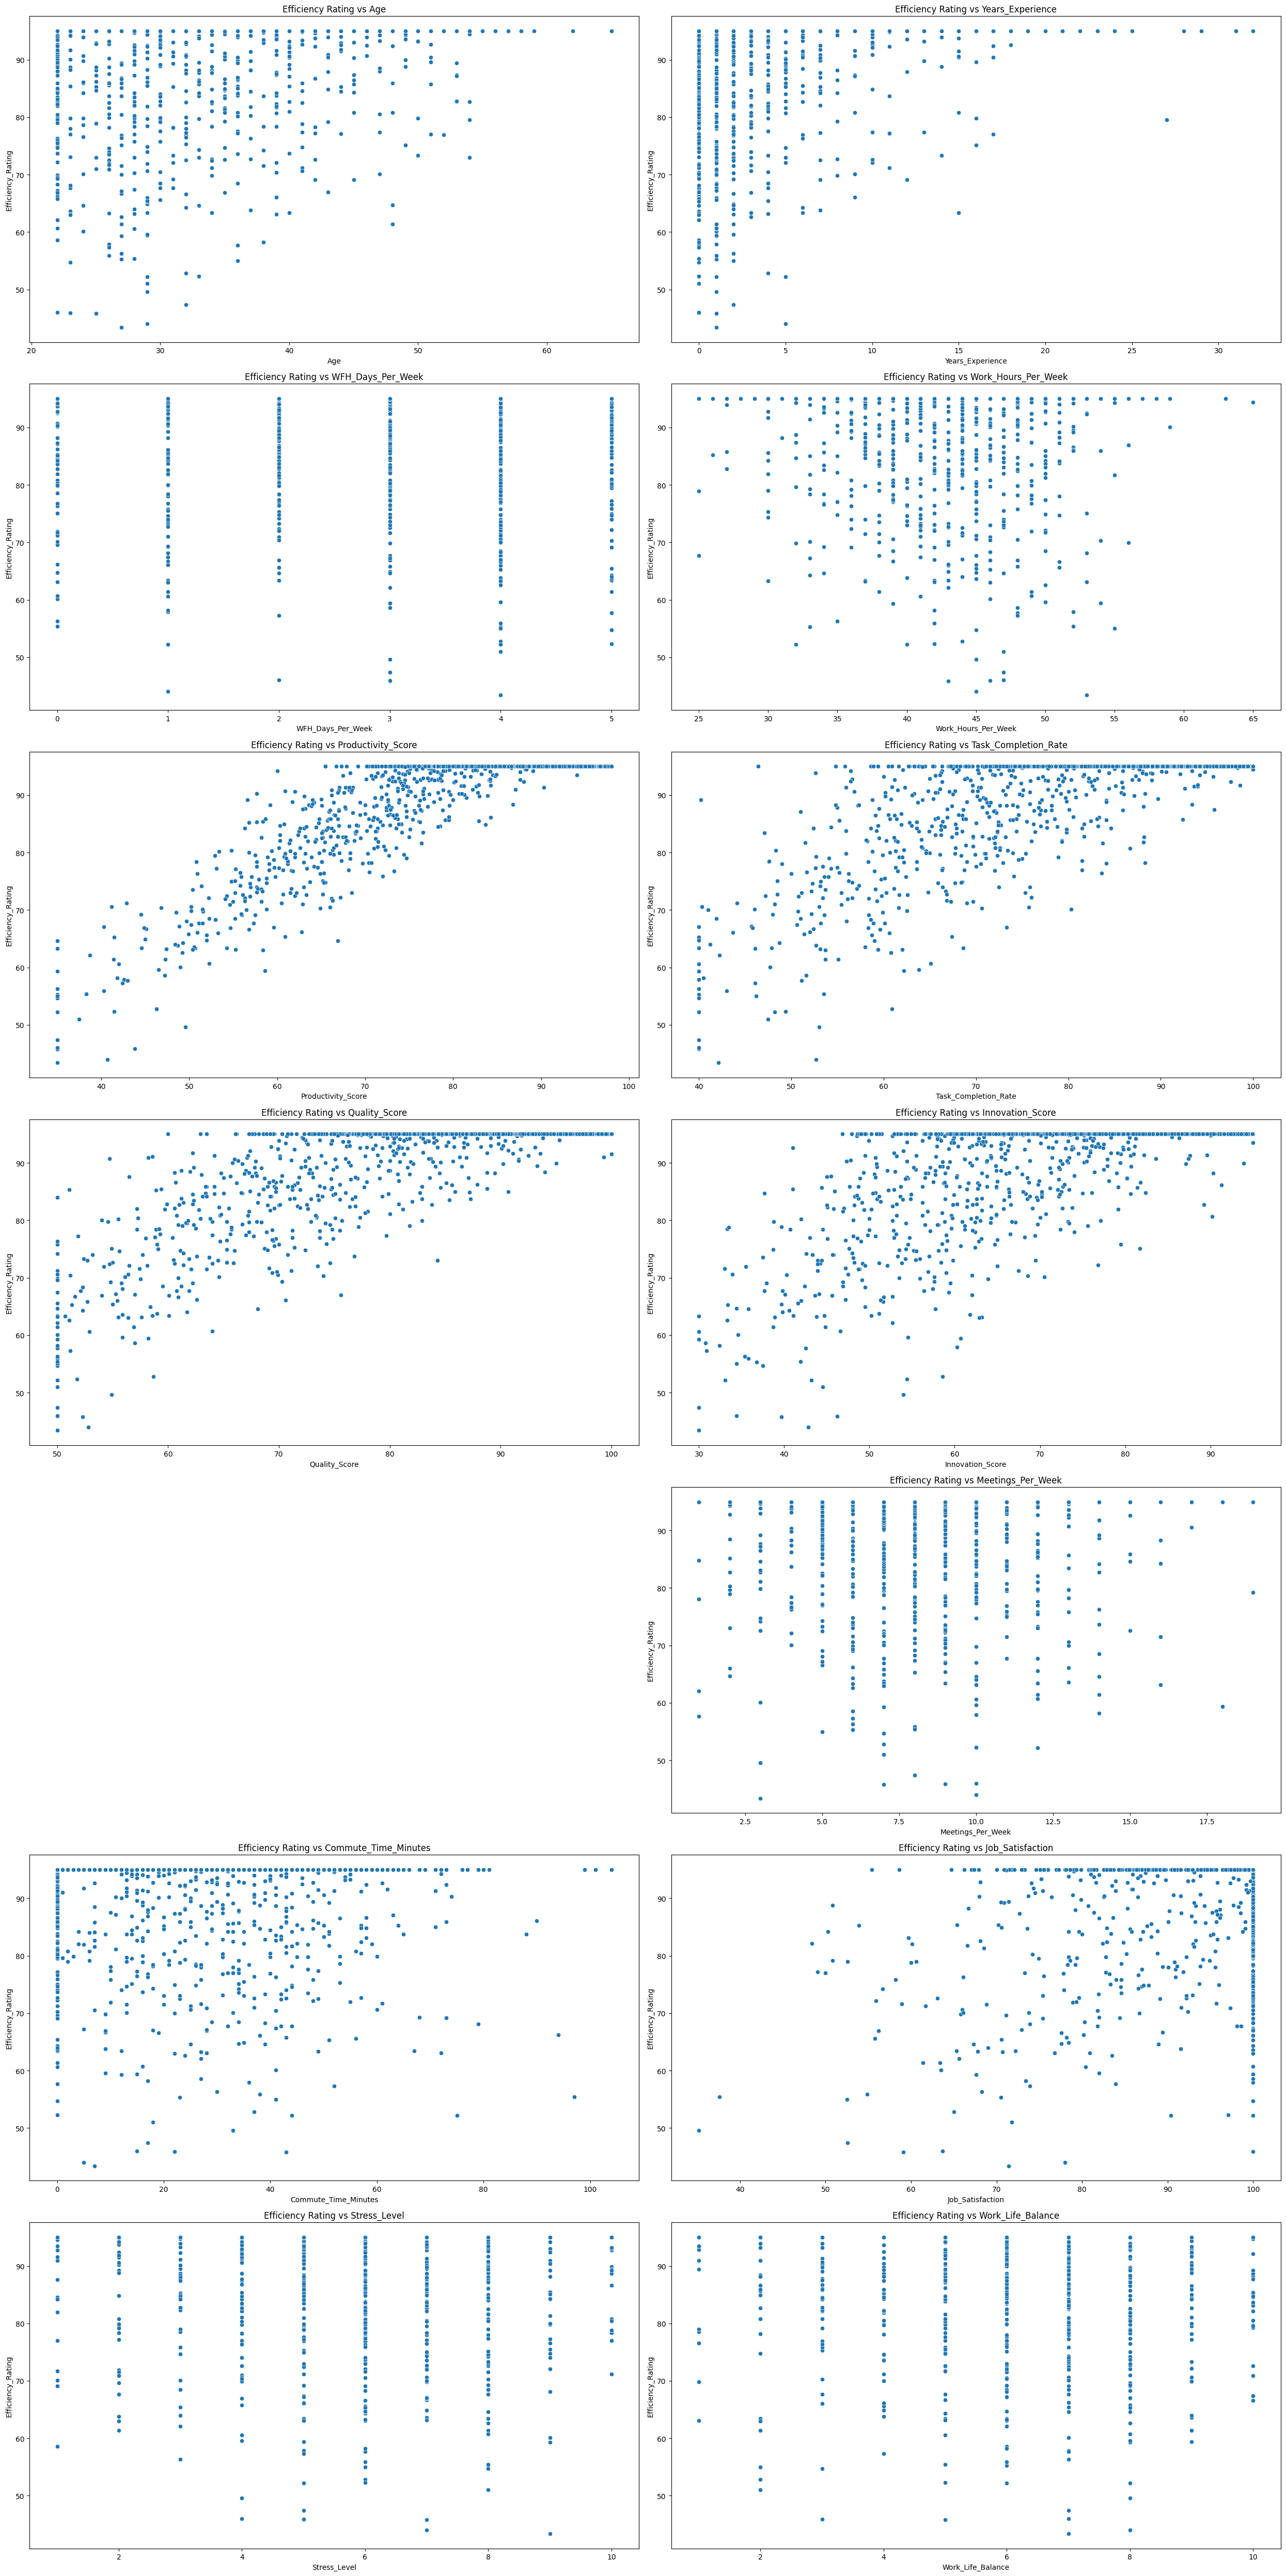

In [10]:
# numerical variables vs Efficiency Rating
f = plt.figure(figsize=(25,50))
for i, col in enumerate(numerical_cols):
    if col != 'Efficiency_Rating':
        ax = f.add_subplot(7,2,i+1)
        sns.scatterplot(data=df, x=col, y='Efficiency_Rating')
        ax.set_title(f'Efficiency Rating vs {col}')
f.tight_layout()
# Pozitif korelasyon olan değişkenler var onları kullanabiliriz.

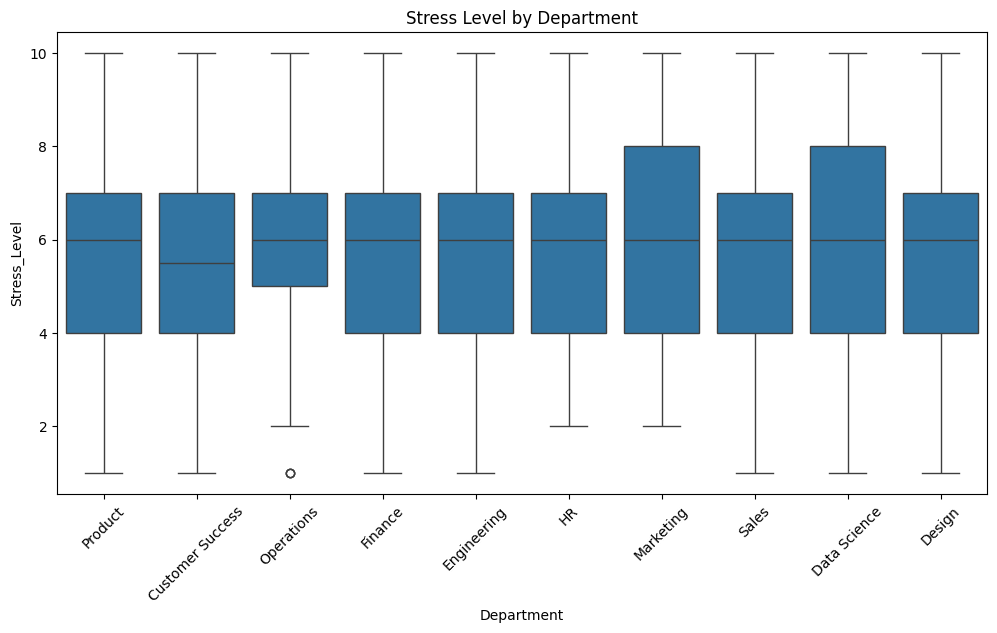

In [11]:
# Job Role vs Stress Level
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Department', y='Stress_Level')    
plt.title('Stress Level by Department')
plt.xticks(rotation=45)
plt.show()

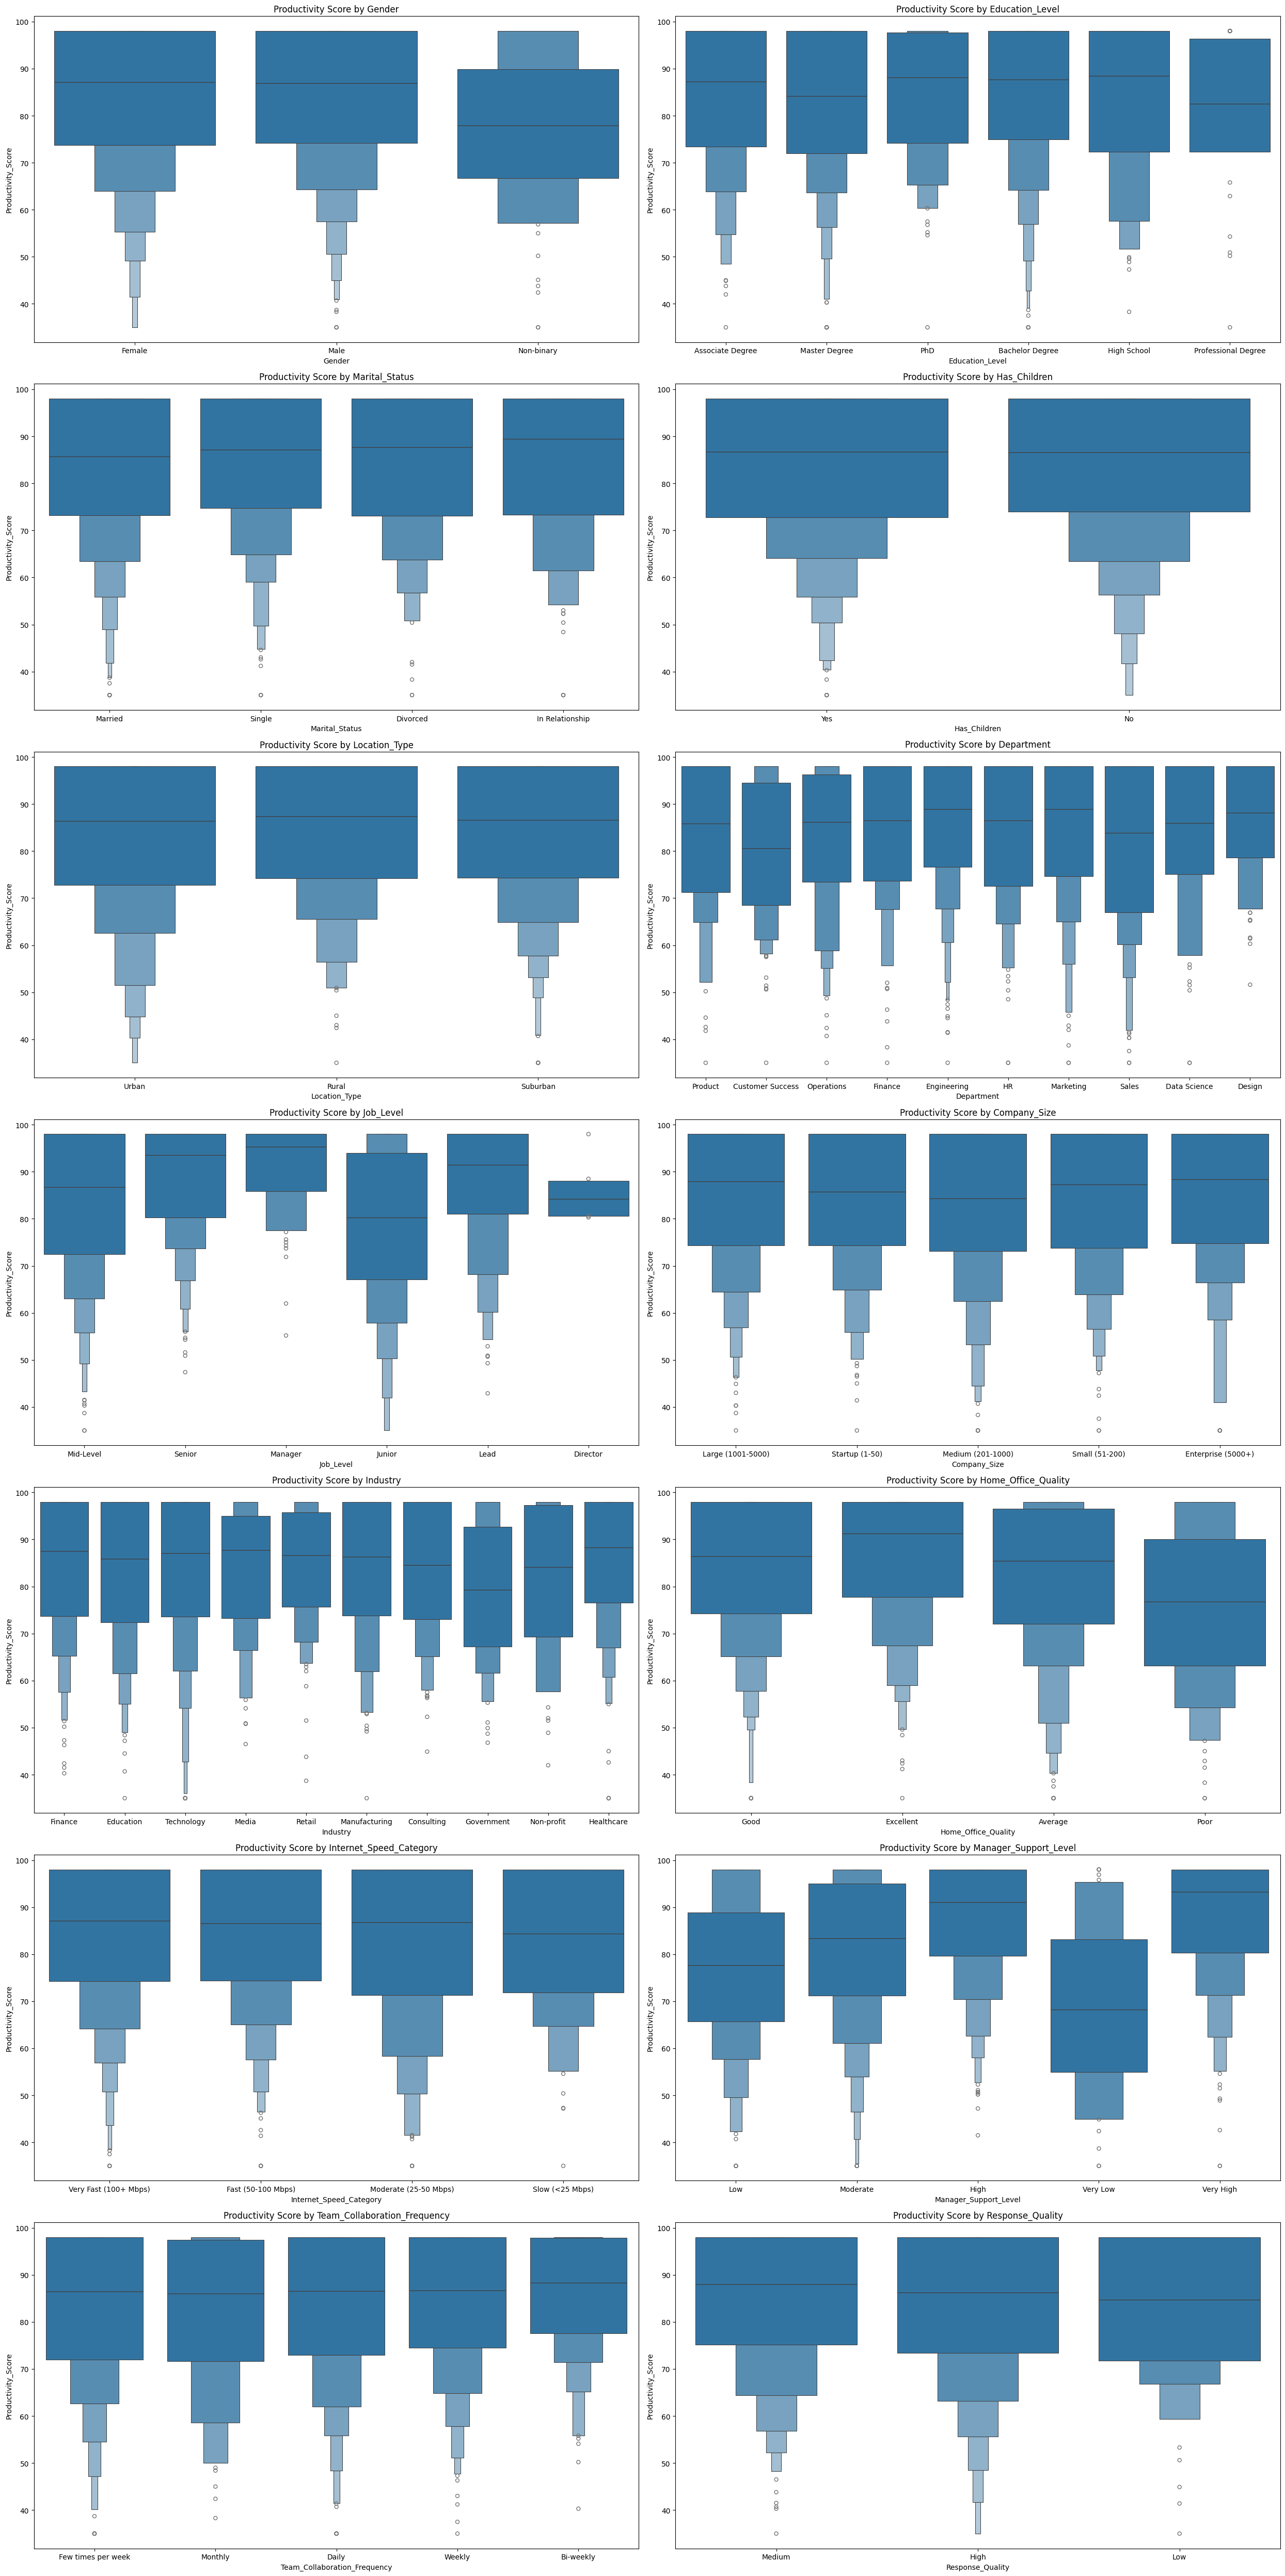

In [12]:
# Productivity Score vs other categorical variables
f = plt.figure(figsize=(25,50))
for i,col in enumerate(categorical_cols):
    ax = f.add_subplot(7,2, i+1)
    sns.boxenplot(data=df, x=col, y='Productivity_Score')
    ax.set_title(f'Productivity Score by {col}')
f.tight_layout()
# Manager Support burada önemli gözüküyor.

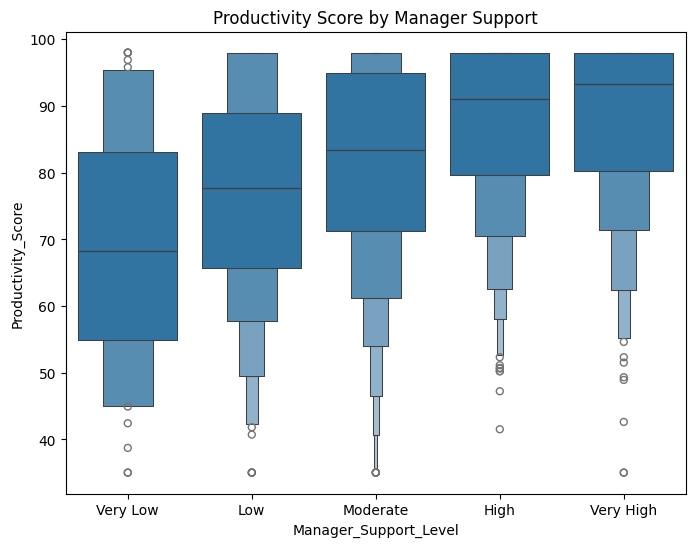

In [13]:
# Productivity Score vs Manager Support
plt.figure(figsize=(8,6))
sns.boxenplot(data=df, x='Manager_Support_Level', y='Productivity_Score', order=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
plt.title('Productivity Score by Manager Support')
plt.show()

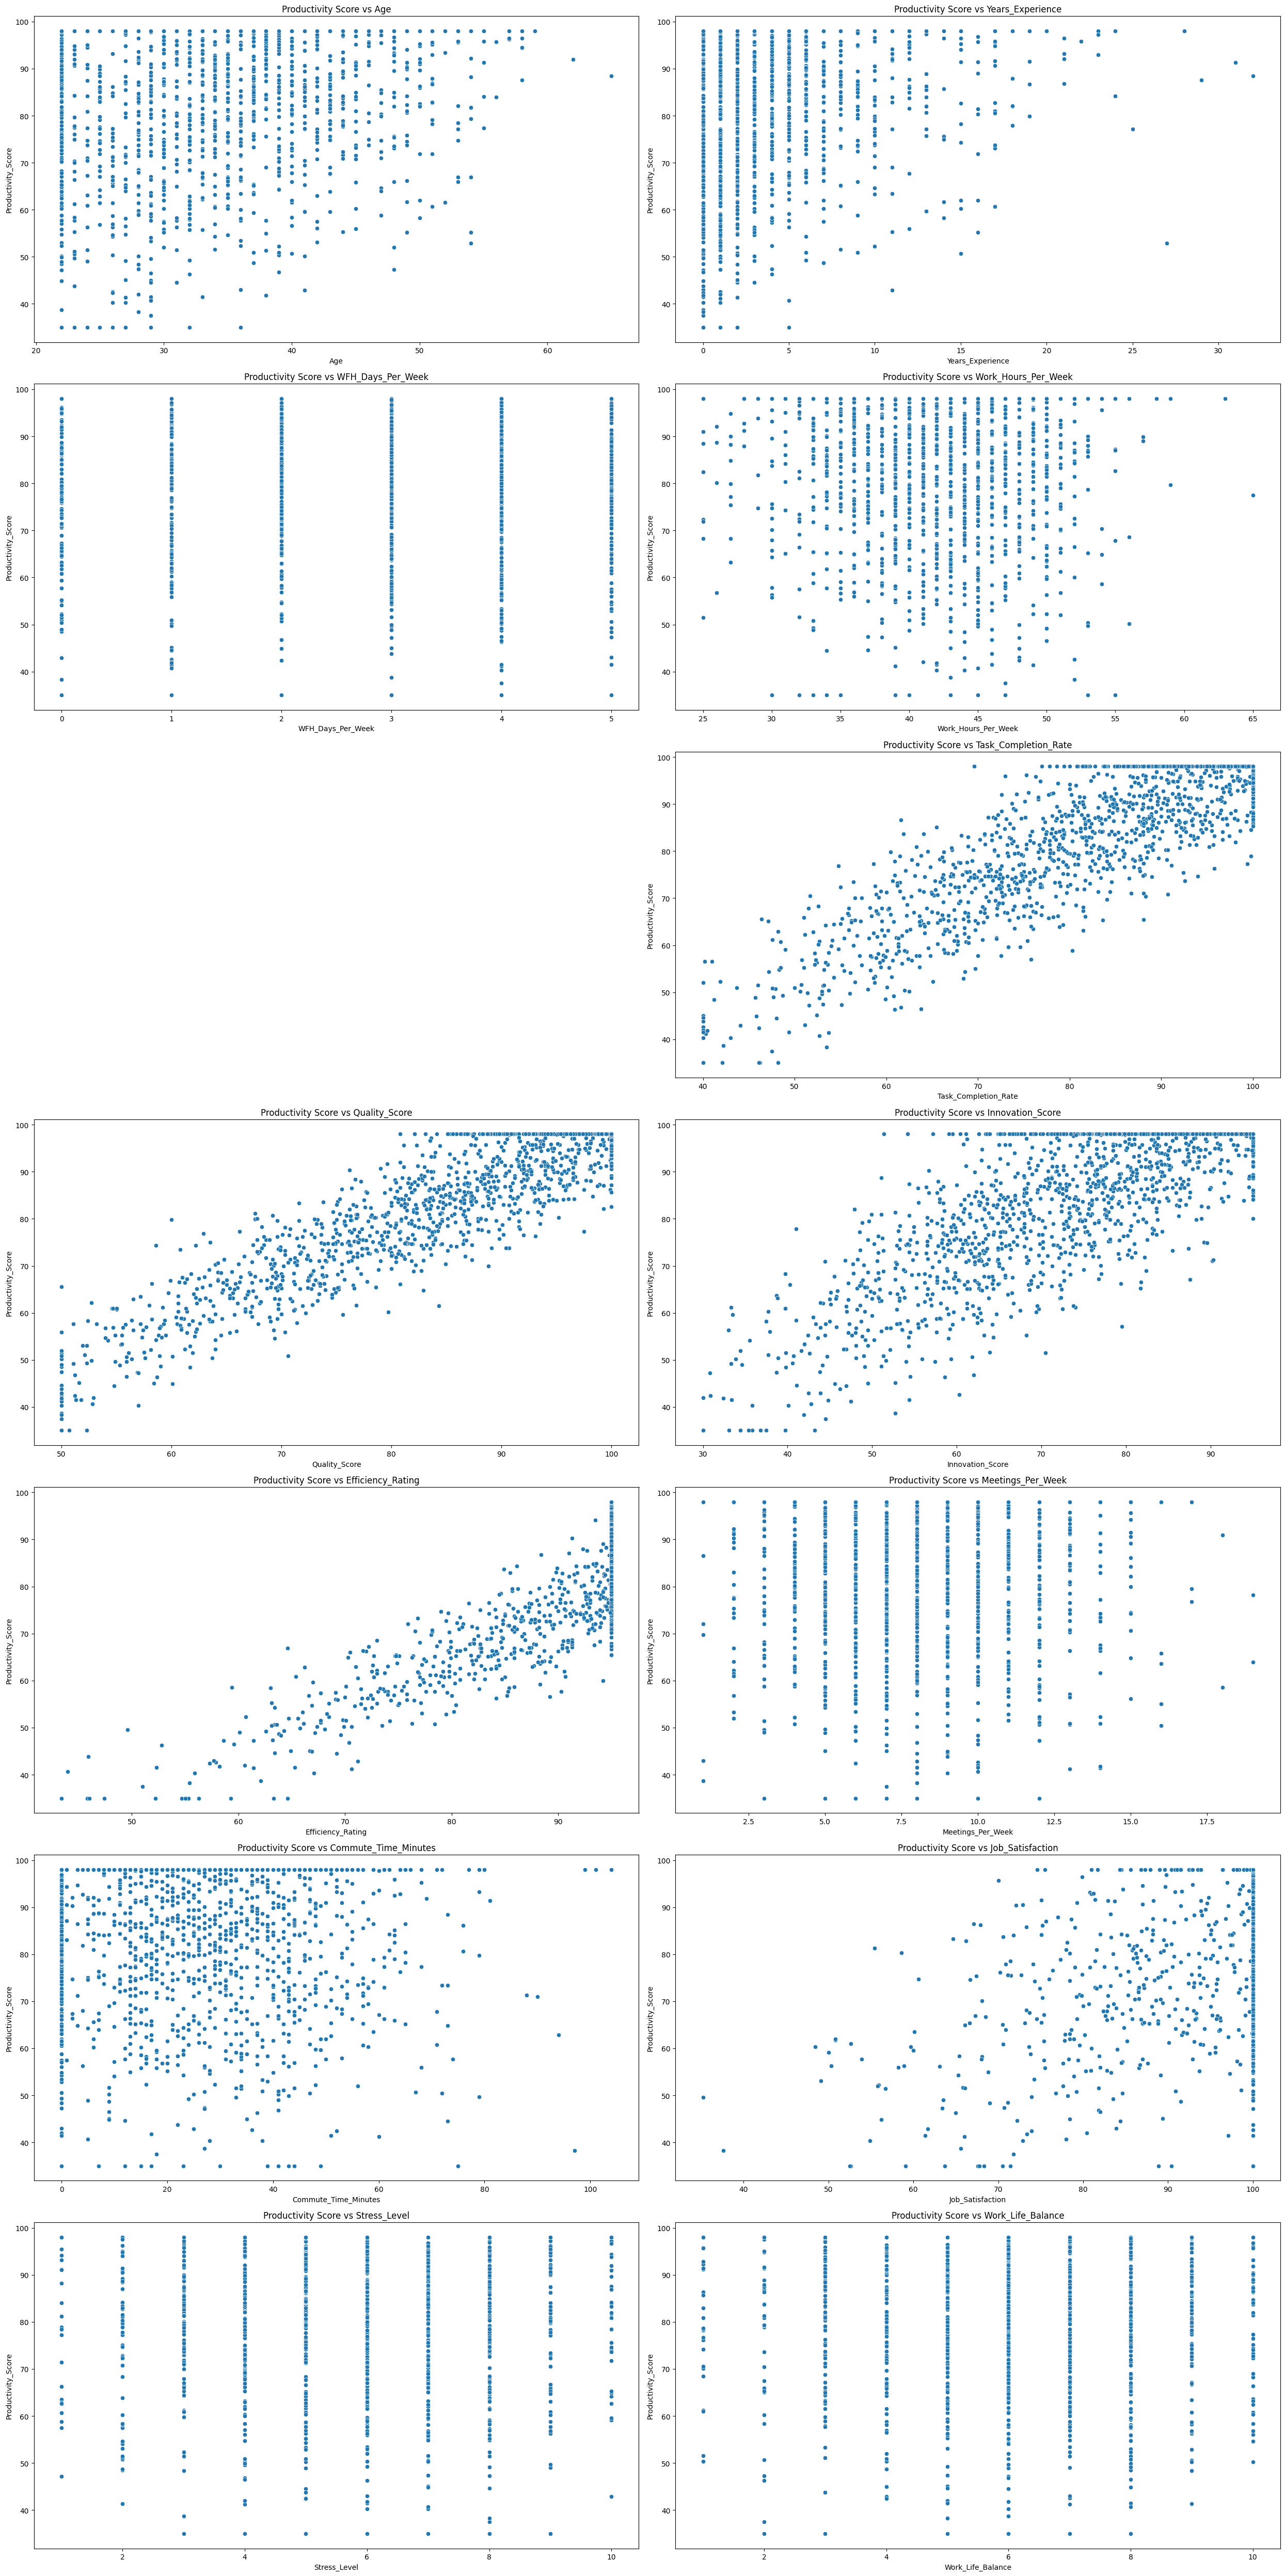

In [14]:
# Numerical variables vs Productivity Score
f = plt.figure(figsize=(25,50))
for i, col in enumerate(numerical_cols):
    if col != 'Productivity_Score':
        ax = f.add_subplot(7,2,i+1)
        sns.scatterplot(data=df, x=col, y='Productivity_Score')
        ax.set_title(f'Productivity Score vs {col}')
f.tight_layout()
# Burada da bazı değişkenler pozitif korelasyon gösteriyor.

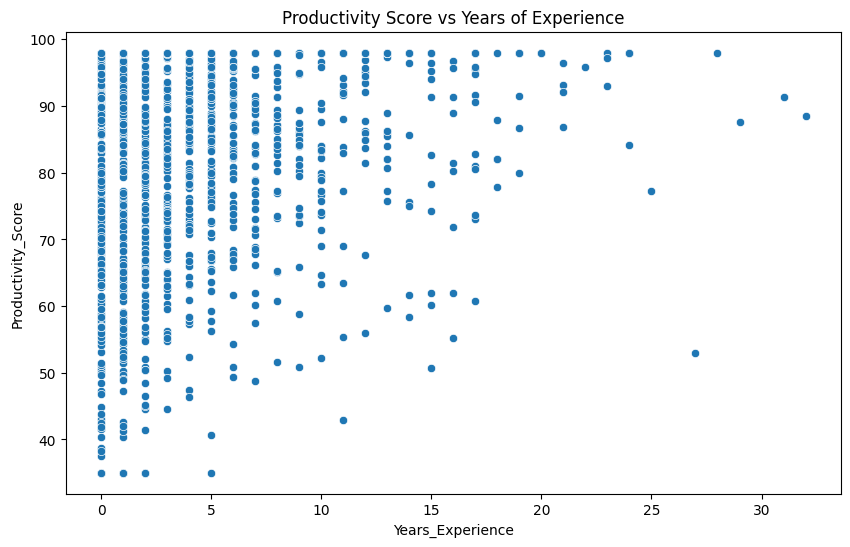

Years of Experience >10 Productivity Score Mean: 88.51
Years of Experience <=10 Productivity Score Mean: 82.44


In [15]:
# Years of Experience impact on remote work effectiveness
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Years_Experience', y='Productivity_Score')
plt.title('Productivity Score vs Years of Experience')
plt.show()
print(f'Years of Experience >10 Productivity Score Mean: {df[df['Years_Experience']>10]['Productivity_Score'].mean().__format__(".2f")}')
print(f'Years of Experience <=10 Productivity Score Mean: {df[df['Years_Experience']<=10]['Productivity_Score'].mean().__format__(".2f")}')

Home_Office_Quality
Poor         76.80
Average      85.45
Good         86.40
Excellent    91.25
Name: Productivity_Score, dtype: float64


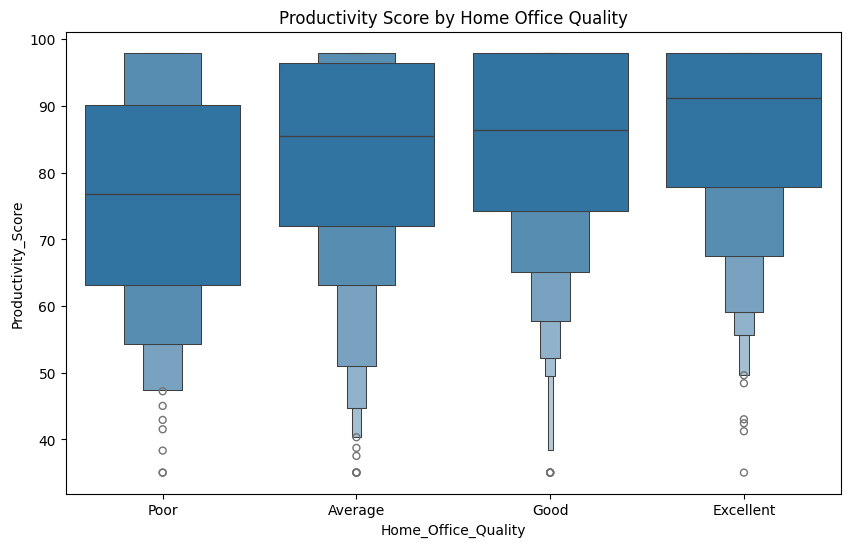

In [16]:
# Environment factors - Home office quality significantly impacts performance
median_scores = df.groupby('Home_Office_Quality')['Productivity_Score'].median()
print(median_scores.sort_values())

# Plot the boxenplot
plt.figure(figsize=(10,6))
sns.boxenplot(data=df, x='Home_Office_Quality', y='Productivity_Score', order=['Poor', 'Average', 'Good', 'Excellent'])
plt.title('Productivity Score by Home Office Quality')
plt.show()

In [17]:
# Conclusion: Manager support, home office quality, and years of experience are key factors influencing remote work productivity.

In [18]:
# Encoding categorical variables for modeling
# Using one-hot encoding for nominal variables and ordinal encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder
ordinal_cols = ['Manager_Support_Level', 'Home_Office_Quality', 'Company_Size', 'Response_Quality', 'Internet_Speed_Category']
ordinal_encoder = OrdinalEncoder()
df[ordinal_cols] = ordinal_encoder.fit_transform(df[ordinal_cols])
df[ordinal_cols].head()

,Manager_Support_Level,Home_Office_Quality,Company_Size,Response_Quality,Internet_Speed_Category
0,1.0,2.0,1.0,2.0,3.0
1,2.0,2.0,4.0,0.0,3.0
2,2.0,1.0,2.0,0.0,0.0
3,0.0,1.0,2.0,0.0,3.0
4,4.0,0.0,3.0,0.0,1.0


In [19]:
# One-hot encoding for remaining categorical variables
df = pd.get_dummies(df, columns=[col for col in categorical_cols if col not in ordinal_cols], drop_first=True)
df = df.astype('float64')
df.head()

,Age,Years_Experience,WFH_Days_Per_Week,Company_Size,Home_Office_Quality,Internet_Speed_Category,Work_Hours_Per_Week,Manager_Support_Level,Productivity_Score,Task_Completion_Rate,...,Industry_Healthcare,Industry_Manufacturing,Industry_Media,Industry_Non-profit,Industry_Retail,Industry_Technology,Team_Collaboration_Frequency_Daily,Team_Collaboration_Frequency_Few times per week,Team_Collaboration_Frequency_Monthly,Team_Collaboration_Frequency_Weekly
0,39.0,10.0,2.0,1.0,2.0,3.0,41.0,1.0,52.2,56.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,33.0,4.0,5.0,4.0,2.0,3.0,52.0,2.0,81.5,70.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,40.0,3.0,3.0,2.0,1.0,0.0,43.0,2.0,82.2,81.9,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,48.0,14.0,3.0,2.0,1.0,3.0,45.0,0.0,75.6,70.2,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,32.0,6.0,5.0,3.0,0.0,1.0,42.0,4.0,98.0,98.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
